In [1]:
%display latex

In [2]:
var('r T', domain='real')

(r, T)

In [3]:
zp(r,T) = sqrt((e^(r/2)-T^2)/(e^(r/2)*(r/2-1)+T^2))
zp

(r, T) |--> sqrt(2)*sqrt(-(T^2 - e^(1/2*r))/(2*T^2 + (r - 2)*e^(1/2*r)))

In [4]:
z = integrate(zp(r,T), r)
z

sqrt(2)*integrate(sqrt(-(T^2 - e^(1/2*r))/(2*T^2 + (r - 2)*e^(1/2*r))), r)

In [53]:
def rmin(T):
    if T > 1:
        return RDF(4*ln(T))
    return 2*(lambert_w(-T^2/RDF(e)) + 1)

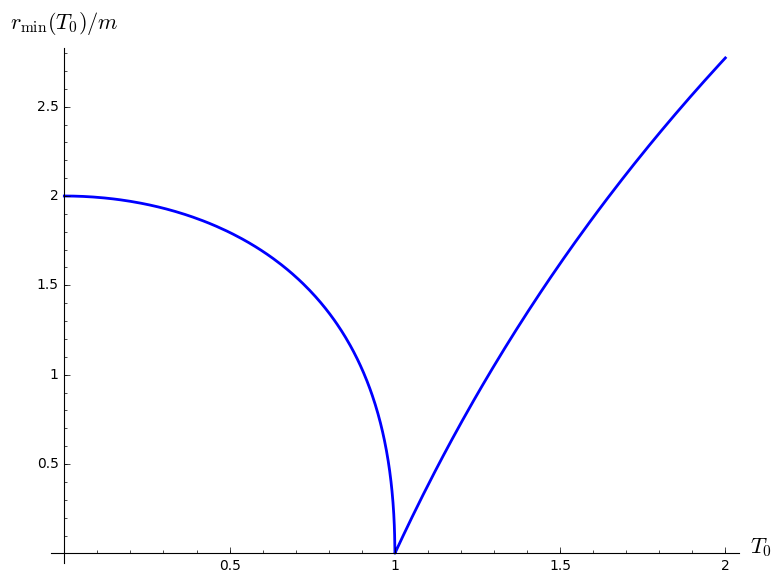

In [54]:
plot(rmin, (T,0,2), axes_labels=[r'$T_0$', r'$r_{\rm min}(T_0)/m$'], thickness=2)

In [55]:
rmin(1/2), rmin(3/2)

(1.796343137811716, 1.6218604324326575)

In [56]:
def zz(r1, T0):
    dzdr = zp(r, T0)
    numint = numerical_integral(dzdr, rmin(T0), r1, algorithm='qags')
    error = numint[1]
    if error > 1e-3: 
        print("Warning: error = {}".format(error))
    return numint[0]

In [57]:
zz(4, 1/2)

4.226847171414399

In [58]:
T0 = 1.5
rmin(T0)
zp(0.1, T0)

(4.23786319857194e-17 + 0.692095582419765*I)*sqrt(2)

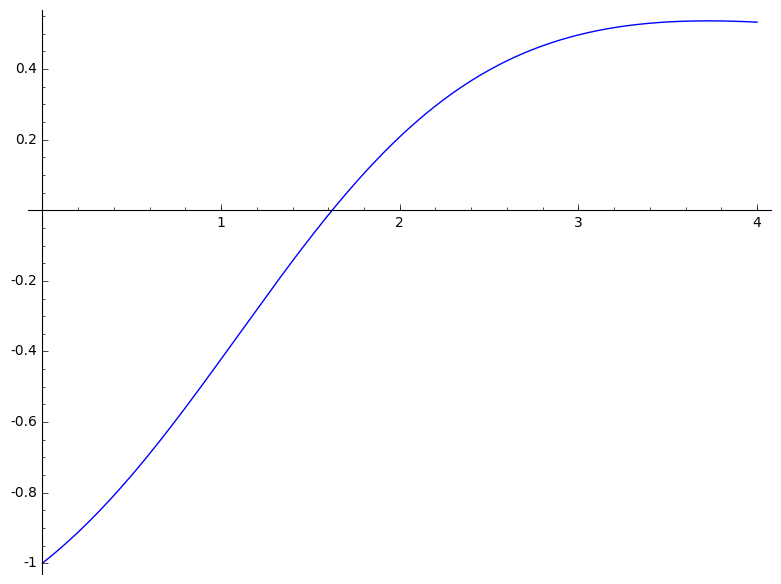

In [48]:
T0=3/2
plot((1-T0^2*e^(-r/2))/(r/2-1+T0^2*e^(-r/2)), (r,0,4)) 

In [59]:
T0 = 0.5
zp0 = zp(r, T0)
numerical_integral(zp0, rmin(T0), 6, algorithm='qags')

(5.852120975442055, 1.634703099107071e-06)

In [60]:
T0_list = [0, 0.98, 0.99, 0.999, 0.99999]
g = Graphics()
for T0 in T0_list:
    g += plot(lambda r: zz(r, T0), rmin(T0), 20)

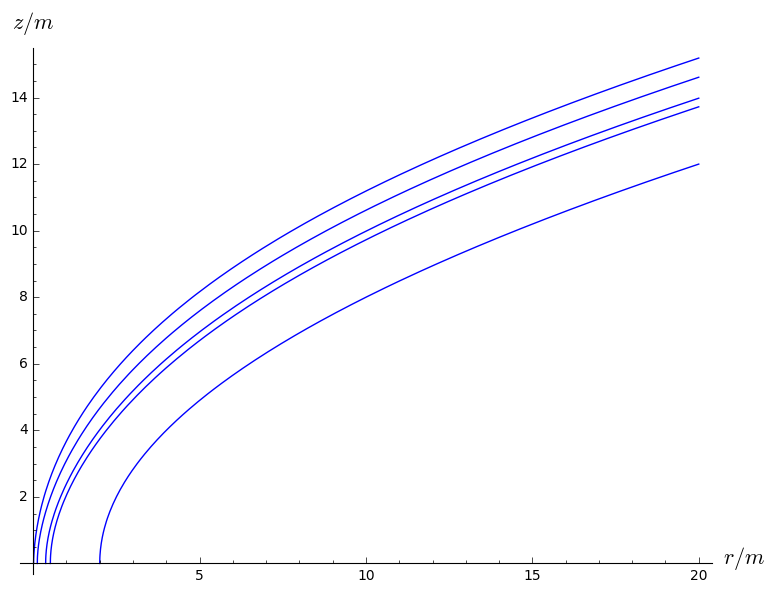

In [17]:
show(g, aspect_ratio=1, xmin=0, xmax=20, axes_labels=[r'$r/m$', r'$z/m$'])

In [18]:
var('ph', latex_name=r'\phi', domain='real')

ph

In [19]:
from sage.manifolds.utilities import set_axes_labels

In [30]:
T0 = 0
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='wheat')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

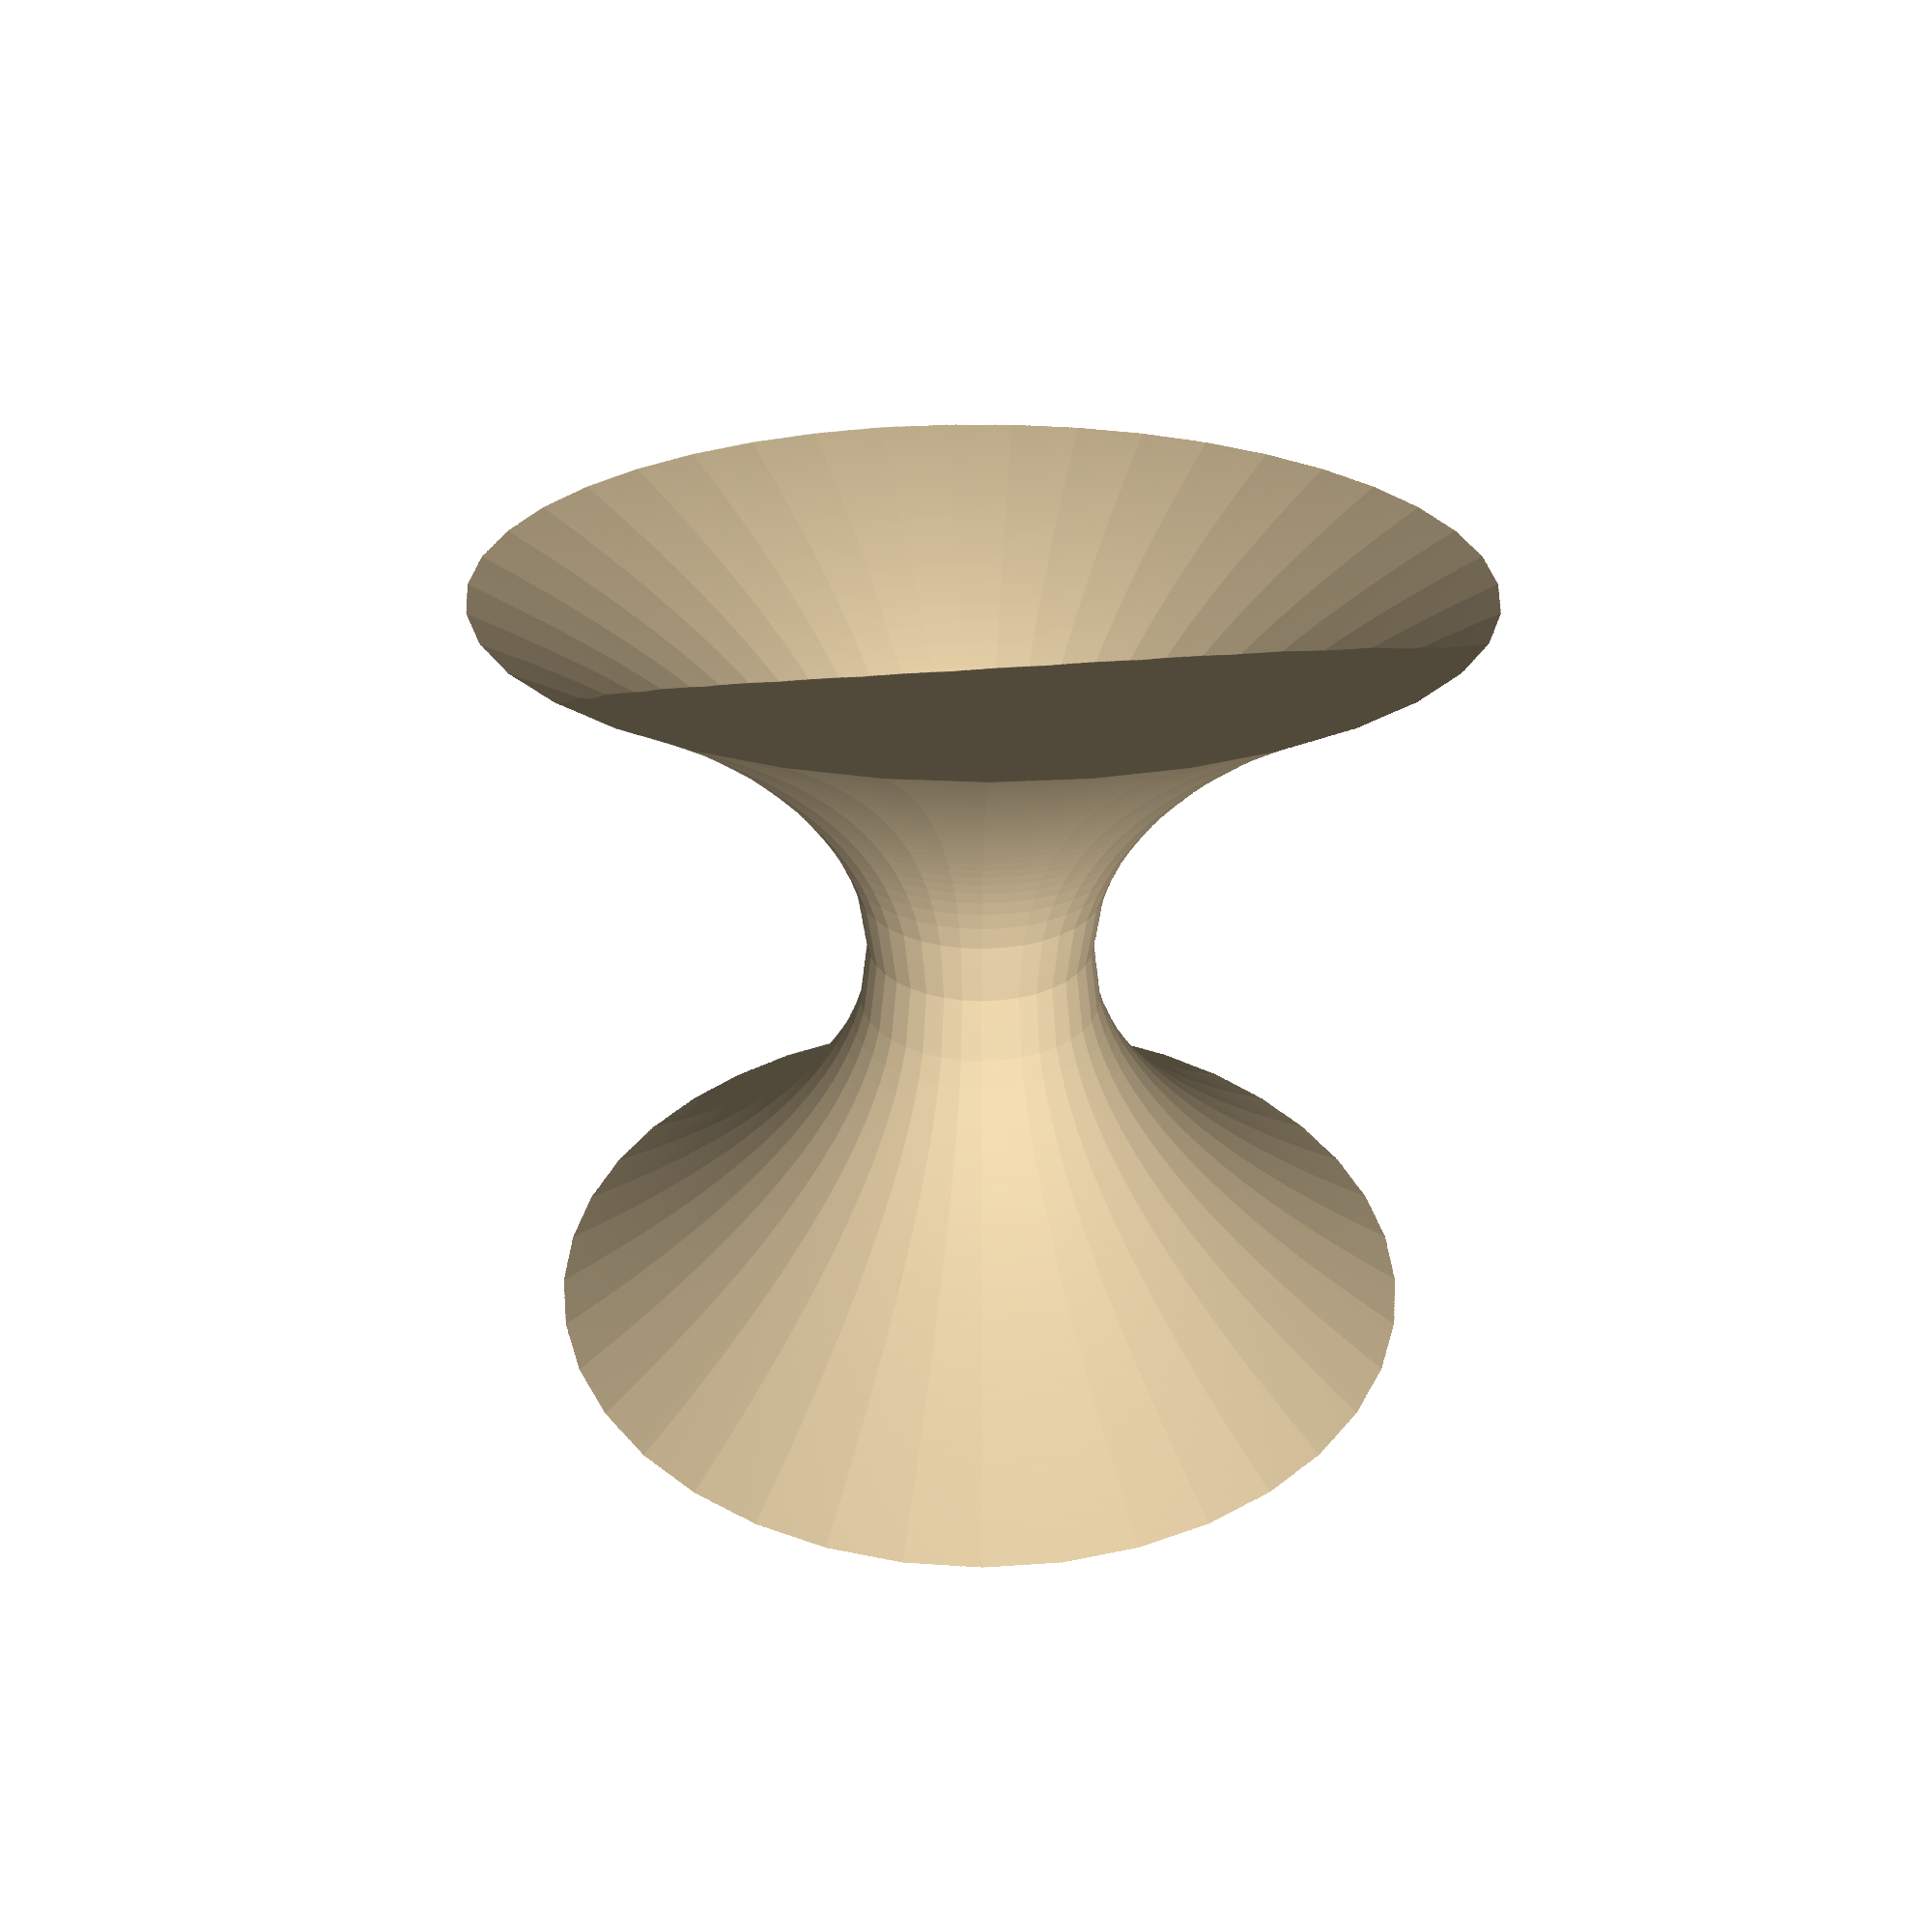

In [31]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False, figsize=20)

In [88]:
g.save('max_flamm_paraboloid.png', aspect_ratio=1)

In [80]:
T0 = 0.99999
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

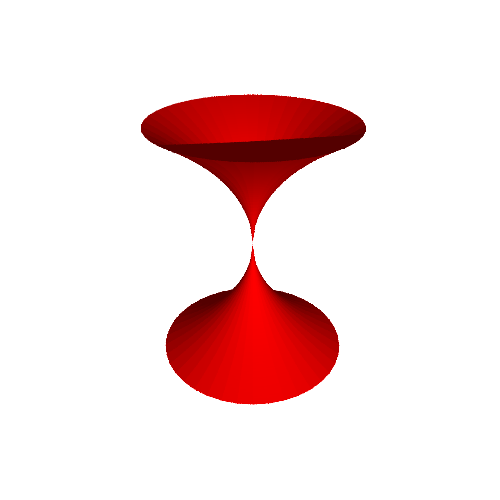

In [79]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False)